In [139]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import h5py
import math as m
from pathlib import Path
from scipy.io import FortranFile
from sklearn.linear_model import LinearRegression
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')
#from PyPDF2 import PdfFileMerger
#from PyPDF2 import PdfFileReader

#===========================================================================================

def get_constants(path,filename):
    
    if filename == 'gammaPI_r0': 
        time = np.loadtxt(path+filename+'.csv',usecols=0)
        var = np.loadtxt(path+filename+'.csv', usecols=(1,2,3))
        sigmavar = np.loadtxt(path+'sigma_'+filename+'.csv', usecols=(1,2,3))
        var = np.swapaxes(var,0,1)
        sigmavar = np.swapaxes(sigmavar,0,1)
            
    else:
        time = np.loadtxt(path+filename+'.csv',usecols=0)
        var = np.loadtxt(path+filename+'.csv', usecols=(1,2,3,4,5,6))
        sigmavar = np.loadtxt(path+'sigma_'+filename+'.csv', usecols=(1,2,3,4,5,6))
        var = np.swapaxes(var,0,1)
        sigmavar = np.swapaxes(sigmavar,0,1)
        
    return var, sigmavar,time

#===========================================================================================

def log_scale(var):

    logvar = (np.sign(var)*(m.log(abs(var)+1,10)))
    
    return logvar


#===========================================================================================
    
def plot_constants(plotsdir, t0, lent, tfinal, alphaR, ealphaR, betaR, ebetaR, gammaR, egammaR, res,time):
    
   # t = np.linspace(0,tfinal,lent)
    
    t10 = np.linspace(0,tfinal*10,lent)
    index = np.where(t10 == t0*10)
   # print('INDEX fpr the t0: ', index[0])
    ind = int(index[0])
    
   # ind = int(index-1)
    
    alphaR = alphaR[:,ind:]
    ealphaR = ealphaR[:,ind:]
    betaR = betaR[:,ind:]
    ebetaR = ebetaR[:,ind:]
    gammaR = gammaR[:,ind:]
    egammaR = egammaR[:,ind:]
    
    t = time[ind:]
        
    fig, axs = plt.subplots(1,2,sharex = 'all',sharey = False, figsize = (12,4))
    plt.subplots_adjust(hspace = 0.1,wspace = 0.3)
    
    #fig.tight_layout(pad=1.0)
    
    ax1 = axs[0]
    ax3 = axs[1]
    
    ax1.tick_params(axis='x',labelsize = 18)   
    ax3.tick_params(axis='x',labelsize = 18)
    
    ax1.tick_params(axis='y',labelsize = 18)
    ax3.tick_params(axis='y',labelsize = 18)

        
#    for ax in axs.flat:
#        ax.label_outer()
        
    ax1.plot(t, alphaR[0,:], linestyle = 'solid', color = 'darkorchid', label = r'$\alpha_{\rm{R},rr}$')
    ax1.fill_between(t, alphaR[0,:]-ealphaR[0,:], alphaR[0,:]+ealphaR[0,:], color = 'darkorchid', alpha = 0.2)
    ax1.plot(t, alphaR[3,:], linestyle = 'dashed' , color = 'darkcyan', label = r'$\alpha_{\rm{R},\phi\phi}$')
    ax1.fill_between(t, alphaR[3,:]-ealphaR[3,:], alphaR[3,:]+ealphaR[3,:], color='darkcyan', alpha = 0.2)
    ax1.plot(t, alphaR[5,:], linestyle = 'dotted', color = 'darkorange', label = r'$\alpha_{\rm{R},zz}$')
    ax1.fill_between(t, alphaR[5,:]-ealphaR[5,:], alphaR[5,:]+ealphaR[5,:], color='darkorange', alpha = 0.2)
    ax1.set_xlabel('Time [ms]', fontsize = 20)
    ax1.set_ylabel(r'$\alpha_{ij}$', fontsize = 20)
    ax1.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
    ax1.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)
    ax1.set_xlim([13,30])
    
    ax3.plot(t, betaR[0,:], linestyle = 'solid', color = 'darkorchid', label = r'$rr$')
    ax3.fill_between(t, betaR[0,:]-ebetaR[0,:], betaR[0,:]+ebetaR[0,:], color = 'darkorchid', alpha = 0.2)
    ax3.plot(t, betaR[3,:], linestyle = 'dashed' , color = 'darkcyan', label = r'$\phi\phi$')
    ax3.fill_between(t, betaR[3,:]-ebetaR[3,:], betaR[3,:]+ebetaR[3,:], color='darkcyan', alpha = 0.2)
    ax3.plot(t, betaR[5,:], linestyle = 'dotted', color = 'darkorange', label = r'$zz$')
    ax3.fill_between(t, betaR[5,:]-ebetaR[5,:], betaR[5,:]+ebetaR[5,:], color='darkorange', alpha = 0.2)
    ax3.set_xlabel('Time [ms]', fontsize = 20)
    ax3.set_ylabel(r'$\beta_{ij}$', fontsize = 20)
    ax3.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
    ax3.legend(bbox_to_anchor=(1.4,0.7), ncol = 1, frameon = 'True',prop={"size":19})
    ax3.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)
    plt.savefig('/home/miquelmiravet/Desktop/figs_mri/diag-coeffs_MRI-H1.pdf',bbox_inches='tight')

   
    fig, ax = plt.subplots(1,3,sharex = 'all',sharey = False, figsize = (18,4))
    plt.subplots_adjust(hspace = 0.1,wspace = 0.3)
    
    ax2 = ax[0]
    ax4 = ax[1]
    ax5 = ax[2]
    
    
    ax5.tick_params(axis='x',labelsize = 18)
    ax2.tick_params(axis='x',labelsize = 18)
    ax4.tick_params(axis='x',labelsize = 18)
    ax2.tick_params(axis='y',labelsize = 18)
    ax4.tick_params(axis='y',labelsize = 18)
    ax5.tick_params(axis='y',labelsize = 18)

    ax5.plot(t, gammaR[1,:], linestyle = 'solid', color = 'darkorchid', label = r'$rz$')
    ax5.fill_between(t, gammaR[1,:]-egammaR[1,:], gammaR[1,:]+egammaR[1,:], color='darkorchid', alpha = 0.2)
    ax5.plot(t, gammaR[0,:], linestyle = 'dashed', color = 'darkcyan', label = r'$r\phi$')
    ax5.fill_between(t, gammaR[0,:]-egammaR[0,:], gammaR[0,:]+egammaR[0,:], color = 'darkcyan', alpha = 0.2)
    ax5.plot(t, gammaR[2,:], linestyle = 'dotted', color = 'darkorange', label = r'$\phi z$')
    ax5.fill_between(t, gammaR[2,:]-egammaR[2,:], gammaR[2,:]+egammaR[2,:], color='darkorange', alpha = 0.2)
    ax5.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)

    ax2.plot(t, alphaR[2,:], linestyle = 'solid', color = 'darkorchid', label = r'$\alpha_{\rm{R},rz}$')
    ax2.fill_between(t, alphaR[2,:]-ealphaR[2,:], alphaR[2,:]+ealphaR[2,:], color='darkorchid', alpha = 0.2)
    ax2.plot(t, alphaR[1,:], linestyle = 'dashed', color = 'darkcyan', label = r'$\alpha_{\rm{R},r\phi}$')
    ax2.fill_between(t, alphaR[1,:]-ealphaR[1,:], alphaR[1,:]+ealphaR[1,:], color='darkcyan', alpha = 0.2)
    ax2.plot(t, alphaR[4,:], linestyle = 'dotted', color = 'darkorange', label = r'$\alpha_{\rm{R},\phi z}$')
    ax2.fill_between(t, alphaR[4,:]-ealphaR[4,:], alphaR[4,:]+ealphaR[4,:], color='darkorange', alpha = 0.2)
    ax2.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)
    #ax2.set_ylim([-2,-2.5])
    ax2.set_xlim([13,30])
    
    ax4.plot(t, betaR[2,:], linestyle = 'solid', color = 'darkorchid', label = r'$\beta_{\rm{R},rz}$')
    ax4.fill_between(t, betaR[2,:]-ebetaR[2,:], betaR[2,:]+ebetaR[2,:], color='darkorchid', alpha = 0.2)
    ax4.plot(t, betaR[1,:], linestyle = 'dashed', color = 'darkcyan', label = r'$\beta_{\rm{R},r\phi}$')
    ax4.fill_between(t, betaR[1,:]-ebetaR[1,:], betaR[1,:]+ebetaR[1,:], color='darkcyan', alpha = 0.2)
    ax4.plot(t, betaR[4,:], linestyle = 'dotted', color = 'darkorange', label = r'$\beta_{\rm{R},\phi z}$')
    ax4.fill_between(t, betaR[4,:]-ebetaR[4,:], betaR[4,:]+ebetaR[4,:], color='darkorange', alpha = 0.2)
    ax4.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)

    ax2.set_xlabel('Time [ms]', fontsize = 20)
    ax2.set_ylabel(r'$\alpha_{ij}$', fontsize = 20)
    #ax2.set_ylim((2,-1))
    ax2.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
    ax4.set_xlabel('Time [ms]', fontsize = 20)
    ax4.set_ylabel(r'$\beta_{ij}$', fontsize = 20)
    #ax2.set_ylim((2,-1))
    ax4.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
    ax5.set_xlabel('Time [ms]', fontsize = 20)
    ax5.set_ylabel(r'$\gamma_{ij}$',fontsize = 20)
    ax5.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
    #plt.yscale('symlog')
    ax5.legend(bbox_to_anchor=(1.45,0.7), ncol = 1, frameon = 'True',prop={"size":20})
  
    plt.savefig('/home/miquelmiravet/Desktop/figs_mri/non-diag-coeffs_MRI-H1.pdf',bbox_inches='tight')

    
    return()
            
#===========================================================================================

#===========================================================================================

def main():
    
    lent = 61
    tfinal = 30
    t_0 = 12.5
    resu = ['100_400_100','60_240_60','76_304_76']    
    #for j in range(0,3):
    
    j = 0
    
    if j==0:
        
        print('RESOLUTION : ',resu[j])
        
        filesdir = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_'+resu[j]+'/surface_av/b0z-4.6e13/v2/'

        plotsdir = filesdir+'plots-new'
        
        try:
            os.makedirs(plotsdir)
        except OSError as error:
            print(error)

        lentit = lent
        tfinalit = tfinal
        t0it = t_0
        
       
        #constants:
        
        alphaR, ealphaR,time = get_constants(filesdir,'alphaPI_r0')
        
        betaR, ebetaR,time = get_constants(filesdir,'betaPI_r0')

        gammaR, egammaR,time = get_constants(filesdir,'gammaPI_r0')
        
    
        
        #plots:
        
        plot_constants(plotsdir,t0it,lentit, tfinalit, alphaR, ealphaR, betaR, ebetaR, gammaR, egammaR, resu[j],time)
        
    return()
    


RESOLUTION :  100_400_100
[Errno 17] File exists: '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_100_400_100/surface_av/b0z-4.6e13/v2/plots-new'


()

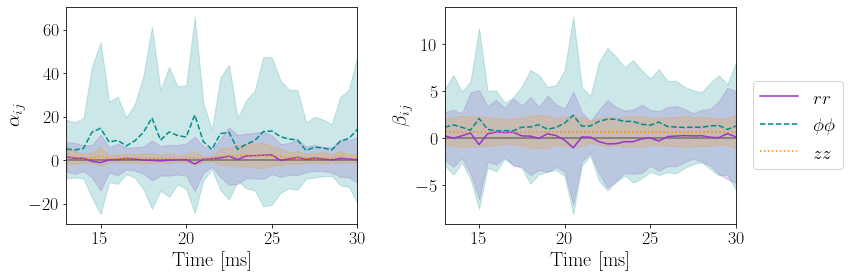

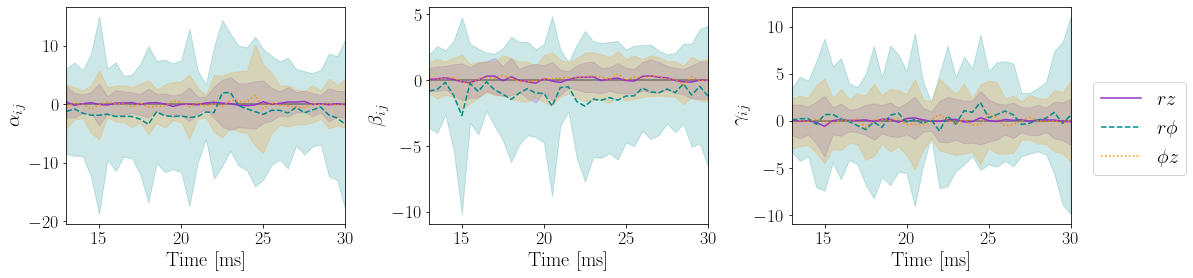

In [140]:
main()

In [74]:
filesdir = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/coeffs-MRI-final'

alpha_av = np.loadtxt(filesdir+'/alphaR_r0_av.txt')
ealpha_av = np.loadtxt(filesdir+'/sigma_alphaR_r0_av.txt')
beta_av = np.loadtxt(filesdir+'/betaR_r0_av.txt')
ebeta_av = np.loadtxt(filesdir+'/sigma_betaR_r0_av.txt')
gamma_av = np.loadtxt(filesdir+'/gammaR_r0_av.txt')
egamma_av = np.loadtxt(filesdir+'/sigma_gammaR_r0_av.txt')
coord = ['rr','rphi','rz','phiphi','phiz','zz']

for i in range(0,6):
    print('alpha_ %s = %.3f +- %.3f'%(coord[i],alpha_av[i],ealpha_av[i]))
print('*'*60)
for i in range(0,6):
    print('beta_ %s = %.3f +- %.3f'%(coord[i],beta_av[i],ebeta_av[i]))
print('*'*60)

coord2 =['rphi','rz','phiz']
    
for i in range(0,3):
    print('gamma_ %s = %.3f +- %.3f'%(coord2[i],gamma_av[i],egamma_av[i]))
print('*'*60)    


alpha_ rr = 0.110 +- 0.030
alpha_ rphi = -0.150 +- 0.040
alpha_ rz = 0.001 +- 0.011
alpha_ phiphi = 0.370 +- 0.090
alpha_ phiz = -0.003 +- 0.019
alpha_ zz = 0.027 +- 0.010
************************************************************
beta_ rr = 0.600 +- 0.100
beta_ rphi = 0.180 +- 0.140
beta_ rz = 0.008 +- 0.071
beta_ phiphi = 1.120 +- 0.120
beta_ phiz = 0.030 +- 0.100
beta_ zz = 0.250 +- 0.060
************************************************************
gamma_ rphi = 0.015 +- 0.100
gamma_ rz = 0.002 +- 0.033
gamma_ phiz = -0.010 +- 0.060
************************************************************


In [128]:
filesdir = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_100_400_100/surface_av/b0z-4.6e13/v2/'

alpha_av = np.loadtxt(filesdir+'/alphaPI_r0_av.txt')
ealpha_av = np.loadtxt(filesdir+'/sigma_alphaPI_r0_av.txt')
beta_av = np.loadtxt(filesdir+'/betaPI_r0_av.txt')
ebeta_av = np.loadtxt(filesdir+'/sigma_betaPI_r0_av.txt')
gamma_av = np.loadtxt(filesdir+'/gammaPI_r0_av.txt')
egamma_av = np.loadtxt(filesdir+'/sigma_gammaPI_r0_av.txt')
coord = ['rr','rphi','rz','phiphi','phiz','zz']

for i in range(0,6):
    print('alpha_ %s = %.3f +- %.3f'%(coord[i],alpha_av[i],ealpha_av[i]))
print('*'*60)
for i in range(0,6):
    print('beta_ %s = %.3f +- %.3f'%(coord[i],beta_av[i],ebeta_av[i]))
print('*'*60)

coord2 =['rphi','rz','phiz']
    
for i in range(0,3):
    print('gamma_ %s = %.3f +- %.3f'%(coord2[i],gamma_av[i],egamma_av[i]))
print('*'*60)    

alpha_ rr = 0.465 +- 1.206
alpha_ rphi = -1.411 +- 1.481
alpha_ rz = 0.056 +- 0.343
alpha_ phiphi = 7.320 +- 3.162
alpha_ phiz = -0.098 +- 0.583
alpha_ zz = 0.847 +- 0.378
************************************************************
beta_ rr = 0.076 +- 0.546
beta_ rphi = -0.821 +- 0.580
beta_ rz = 0.026 +- 0.181
beta_ phiphi = 1.174 +- 0.813
beta_ phiz = 0.074 +- 0.255
beta_ zz = 0.667 +- 0.260
************************************************************
gamma_ rphi = 0.093 +- 0.807
gamma_ rz = 0.015 +- 0.287
gamma_ phiz = -0.053 +- 0.506
************************************************************


In [73]:
filesdir = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_60_240_60/surface_av/b0z-4.6e13/early_t'

alpha_av = np.loadtxt(filesdir+'/alphaR_r0_av.txt')
ealpha_av = np.loadtxt(filesdir+'/sigma_alphaR_r0_av.txt')
beta_av = np.loadtxt(filesdir+'/betaR_r0_av.txt')
ebeta_av = np.loadtxt(filesdir+'/sigma_betaR_r0_av.txt')
gamma_av = np.loadtxt(filesdir+'/gammaR_r0_av.txt')
egamma_av = np.loadtxt(filesdir+'/sigma_gammaR_r0_av.txt')
coord = ['rr','rphi','rz','phiphi','phiz','zz']

for i in range(0,6):
    print('alpha_ %s = %.3f +- %.3f'%(coord[i],alpha_av[i],ealpha_av[i]))
print('*'*60)
for i in range(0,6):
    print('beta_ %s = %.3f +- %.3f'%(coord[i],beta_av[i],ebeta_av[i]))
print('*'*60)

coord2 =['rphi','rz','phiz']
    
for i in range(0,3):
    print('gamma_ %s = %.3f +- %.3f'%(coord2[i],gamma_av[i],egamma_av[i]))
print('*'*60)    

alpha_ rr = 0.088 +- 0.024
alpha_ rphi = -0.121 +- 0.035
alpha_ rz = -0.002 +- 0.009
alpha_ phiphi = 0.321 +- 0.081
alpha_ phiz = 0.002 +- 0.016
alpha_ zz = 0.021 +- 0.008
************************************************************
beta_ rr = 0.504 +- 0.090
beta_ rphi = 0.193 +- 0.144
beta_ rz = -0.008 +- 0.064
beta_ phiphi = 1.209 +- 0.110
beta_ phiz = -0.013 +- 0.096
beta_ zz = 0.227 +- 0.055
************************************************************
gamma_ rphi = 0.011 +- 0.087
gamma_ rz = 0.002 +- 0.029
gamma_ phiz = -0.009 +- 0.053
************************************************************


In [46]:
filesdir = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_100_400_100/volume_av/b0z-2.76e13/'

alpha_av = np.loadtxt(filesdir+'/alphaR_r0_av.txt')
ealpha_av = np.loadtxt(filesdir+'/sigma_alphaR_r0_av.txt')
beta_av = np.loadtxt(filesdir+'/betaR_r0_av.txt')
ebeta_av = np.loadtxt(filesdir+'/sigma_betaR_r0_av.txt')
gamma_av = np.loadtxt(filesdir+'/gammaR_r0_av.txt')
egamma_av = np.loadtxt(filesdir+'/sigma_gammaR_r0_av.txt')
coord = ['rr','rphi','rz','phiphi','phiz','zz']

for i in range(0,6):
    print('alpha_ %s = %.3f +- %.3f'%(coord[i],alpha_av[i],ealpha_av[i]))
print('*'*60)
for i in range(0,6):
    print('beta_ %s = %.3f +- %.3f'%(coord[i],beta_av[i],ebeta_av[i]))
print('*'*60)

coord2 =['rphi','rz','phiz']
    
for i in range(0,3):
    print('gamma_ %s = %.3f +- %.3f'%(coord2[i],gamma_av[i],egamma_av[i]))
print('*'*60)   

OSError: /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/coefficients_r0/res_100_400_100/surface_av/b0z-2.76e13/v2//alphaPI_r0_av.txt not found.

In [21]:
 if j == 0:
            arx = '000'
            listvar=read_data(arx)
        else :
            arx = '0000'
            listvar = readh5files(datadir+'mri-'+str(arx)+'.h5')
        
        r = listvar[1]
        
        multiple = len(r)/2
        if multiple.is_integer() == True:
            a = int(len(r)/2)
            b = int(len(r)/4)
            c = int(3*len(r)/4)
            print('r_0 = ', r[b])
            print('r_1 = ', r[a])
            print('r_2 = ', r[c])
            
            r = np.array([r[b],r[a],r[c]])
            
        else :
            print('r-array is not multiple of 2!')
        
        phi = listvar[2]
        z = listvar[3]
        
        #magnetic and velocity fields: 
        lenr = int(len(r))
        
        Bmean= np.zeros((3,lentit,lenr))
        vmean = np.zeros((3,lentit,lenr))
        eb= np.zeros((3,lentit,lenr))
        ev = np.zeros((3,lentit,lenr))
        
        for x in range(0,lentit):
        
            if j == 0:
                arx = format(10*x, "03")
                listvar=read_data(arx)
            else :
                arx = format(25*x, "04")
                listvar = readh5files(datadir+'mri-'+str(arx)+'.h5')

            Bold = np.array([listvar[4],listvar[5],listvar[6]])*2.874214371*10**(-25)/((4*3.141592653589793)**(0.5))
            B = np.zeros((3,len(r),len(phi),len(z)))
            B[:,0,:,:] = Bold[:,b,:,:]
            B[:,1,:,:] = Bold[:,a,:,:]
            B[:,2,:,:] = Bold[:,c,:,:]
        
            vold = np.array([listvar[7],listvar[8],listvar[9]])*3.33564095*10**(-11)
            v = np.zeros((3,len(r),len(phi),len(z)))
            v[:,0,:,:] = vold[:,b,:,:]
            v[:,1,:,:] = vold[:,a,:,:]
            v[:,2,:,:] = vold[:,c,:,:]
            

            omega = np.array([omega0*(r[0]/r0)**(-q),omega0*(r[1]/r0)**(-q),omega0*(r[2]/r0)**(-q)])
        
            for i in range(0,len(r)):
                v[1,i,:,:] = v[1,i,:,:]-omega[i]*r[i]
        
            Bmean[:,x,:], vmean[:,x,:], eb[:,x,:], ev[:,x,:] = averaging(r,phi,z,B,v)
        
            compare_fields_constants(Bmean,vmean,eb,ev,alphaR,betaR,gammaR,ealphaR,ebetaR,egammaR, tfinalit, lentit, t0it)

[0 1 2]
(3, 1)
